In [ ]:
import numpy as np
from scipy import signal
import time
from numpy import random as rnd
from scipy.ndimage import filters

s1 = rnd.normal(0, 1, (1000,512,512))
sig = [2.]

axes = (1,)
print(len(axes))

In [30]:
tstart = time.time()
sfilt = filters.gaussian_filter(s1, [0., 10., 10.],  mode='reflect')
tend = time.time()

print(tend - tstart)

18.822660207748413


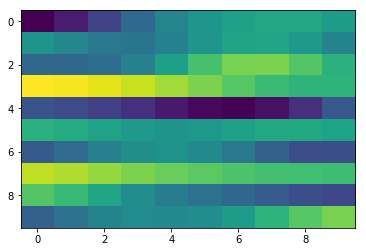

In [24]:
import matplotlib.pyplot as plt

plt.imshow(sfilt[:10,:10,0], aspect='auto')
plt.show()

In [14]:
sdim = s1.ndim
sig = np.array(sig).astype(np.float32)


sfilt = s1
for i in range(0,len(axes)):
    #sfilt = s1
    dims = np.arange(-1,sdim)
    dims[0] = axes[i]
    dims = np.delete(dims, [axes[i]+1])

    sfilt = np.transpose(sfilt, dims)
    print(sfilt.shape)
    
    ns = sfilt.shape[0]
    flat = np.ones((ns,),np.float32)
    for j in range(0,sdim-1):
        flat = np.expand_dims(flat,axis=j+1)

    tmax = np.ceil(4*sig[i])
    dt = np.arange(-tmax,tmax)
    gaus = np.exp(-dt**2 / (2*sig[i]**2))
    gaus /= gaus.sum()
    for j in range(0,sdim-1):
        gaus = np.expand_dims(gaus,axis=j+1)
    print(gaus.shape)
    
    
    
    sfilt = signal.convolve(sfilt, gaus, mode='same')
    snorm = signal.convolve(flat, gaus, mode='same')
    
    
    print(sfilt.shape)
    
    if sfilt.shape[0] > ns:
        icent = int(np.floor(sfilt.shape[0]/2) - np.floor(ns/2))
        inds  = (icent + np.arange(0,ns)).astype(np.int32)
        sout = sfilt[inds,:,:]
        snorm = snorm[inds[0]:inds[-1]+1]

    #sout = sout / snorm
    dims = np.arange(1,sdim)
    dims = np.insert(dims, axes[i], 0)
    print(dims)
    sfilt = np.transpose(sout, dims)
    
    

tend = time.time()

print(tend - tstart)

1
(512, 1000, 512)
(16, 1, 1)
(16, 1, 1)
[1 0 2]
24.87048602104187
